In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt 
import seaborn as sns
np.set_printoptions(suppress=True)

In [2]:
btc = pd.read_csv('coin_Bitcoin.csv')  #first thing we do is 'load' each csv data file into a pandas df
btc['Swing'] = btc['High'] - btc['Low']  #I'm adding a col "Swing" to show the difference between the daily high/low
btc['Percent'] = btc['High'] / btc['Low'] #I've added another col "Percent" to show the quotient of daily high/low prices
btc                                        # variable for the Bitcoin pandas df with its added columns is called

btc.corr()

,SNo,High,Low,Open,Close,Volume,Marketcap,Swing,Percent
SNo,1.000000,0.698823,0.711804,0.704412,0.703350,0.683750,0.700296,0.429368,-0.079923
High,0.698823,1.000000,0.998466,0.999172,0.999358,0.811861,0.998529,0.821499,0.131762
Low,0.711804,0.998466,1.000000,0.998568,0.999034,0.808784,0.998439,0.788666,0.103827
Open,0.704412,0.999172,0.998568,1.000000,0.998288,0.811214,0.997531,0.811254,0.122458
Close,0.703350,0.999358,0.999034,0.998288,1.000000,0.810448,0.999305,0.808520,0.119196
Volume,0.683750,0.811861,0.808784,0.811214,0.810448,1.000000,0.818189,0.685810,0.123243
Marketcap,0.700296,0.998529,0.998439,0.997531,0.999305,0.818189,1.000000,0.805450,0.112331
Swing,0.429368,0.821499,0.788666,0.811254,0.808520,0.685810,0.805450,1.000000,0.393834
Percent,-0.079923,0.131762,0.103827,0.122458,0.119196,0.123243,0.112331,0.393834,1.000000


In [3]:
## more data I can "create" from this CSV like the 
# "Diff", Daily High - Daily Low
 #"Swing", Daily Open - Daily Close  ?? useful?

In [4]:
ltc = pd.read_csv('coin_Litecoin.csv')
ltc['Swing'] = ltc['High'] - ltc['Low'] 
ltc['Percent'] = ltc['High'] / ltc['Low']
ltc

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Swing,Percent
0,1,Litecoin,LTC,2013-04-29 23:59:59,4.573600,4.225640,4.366760,4.383900,0.000000e+00,7.538896e+07,0.347960,1.082345
1,2,Litecoin,LTC,2013-04-30 23:59:59,4.572380,4.168960,4.403520,4.296490,0.000000e+00,7.402092e+07,0.403420,1.096768
2,3,Litecoin,LTC,2013-05-01 23:59:59,4.356860,3.520290,4.289540,3.801010,0.000000e+00,6.560460e+07,0.836570,1.237642
3,4,Litecoin,LTC,2013-05-02 23:59:59,4.039300,3.007170,3.780020,3.371980,0.000000e+00,5.828798e+07,1.032130,1.343223
4,5,Litecoin,LTC,2013-05-03 23:59:59,3.453610,2.395940,3.390440,3.044910,0.000000e+00,5.269485e+07,1.057670,1.441443
...,...,...,...,...,...,...,...,...,...,...,...,...
2857,2858,Litecoin,LTC,2021-02-23 23:59:59,208.369670,159.684673,208.123407,176.934915,1.094470e+10,1.177356e+10,48.684996,1.304882
2858,2859,Litecoin,LTC,2021-02-24 23:59:59,189.165459,169.789009,176.966769,181.378501,7.205360e+09,1.207051e+10,19.376450,1.114121
2859,2860,Litecoin,LTC,2021-02-25 23:59:59,204.743842,176.032145,181.385422,178.901843,7.327999e+09,1.190489e+10,28.711696,1.163105
2860,2861,Litecoin,LTC,2021-02-26 23:59:59,182.075844,163.248248,179.128519,170.398153,7.875998e+09,1.134030e+10,18.827596,1.115331


In [5]:
xrp = pd.read_csv('coin_XRP.csv')
xrp['Swing'] = xrp['High'] - xrp['Low'] 
xrp['Percent'] = xrp['High'] / xrp['Low']
xrp

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Swing,Percent
0,1,XRP,XRP,2013-08-05 23:59:59,0.005980,0.005613,0.005875,0.005613,0.000000e+00,4.387916e+07,0.000367,1.065420
1,2,XRP,XRP,2013-08-06 23:59:59,0.005661,0.004629,0.005637,0.004680,0.000000e+00,3.659101e+07,0.001032,1.223050
2,3,XRP,XRP,2013-08-07 23:59:59,0.004682,0.004333,0.004669,0.004417,0.000000e+00,3.453412e+07,0.000349,1.080647
3,4,XRP,XRP,2013-08-08 23:59:59,0.004424,0.004175,0.004397,0.004254,0.000000e+00,3.325863e+07,0.000249,1.059574
4,5,XRP,XRP,2013-08-09 23:59:59,0.004367,0.004253,0.004257,0.004291,0.000000e+00,3.354750e+07,0.000114,1.026807
...,...,...,...,...,...,...,...,...,...,...,...,...
2759,2760,XRP,XRP,2021-02-23 23:59:59,0.570989,0.379302,0.570989,0.473563,1.435902e+10,2.150165e+10,0.191687,1.505368
2760,2761,XRP,XRP,2021-02-24 23:59:59,0.499370,0.454759,0.474201,0.471832,8.015469e+09,2.142305e+10,0.044611,1.098098
2761,2762,XRP,XRP,2021-02-25 23:59:59,0.482517,0.429103,0.471776,0.434524,5.952354e+09,1.972912e+10,0.053414,1.124477
2762,2763,XRP,XRP,2021-02-26 23:59:59,0.450440,0.415559,0.434941,0.427900,6.476254e+09,1.942839e+10,0.034881,1.083939


In [6]:
xmr = pd.read_csv('coin_Monero.csv')
xmr['Swing'] = xmr['High'] - xmr['Low'] 
xmr['Percent'] = xmr['High'] / xmr['Low']
xmr

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Swing,Percent
0,1,Monero,XMR,2014-05-22 23:59:59,2.188880,1.359090,1.589400,2.095580,1.329180e+05,1.855608e+06,0.829790,1.610548
1,2,Monero,XMR,2014-05-23 23:59:59,3.434370,2.051040,2.051040,2.963020,2.668520e+05,2.692180e+06,1.383330,1.674453
2,3,Monero,XMR,2014-05-24 23:59:59,4.014240,2.617780,2.920390,3.702450,2.480280e+05,3.456658e+06,1.396460,1.533452
3,4,Monero,XMR,2014-05-25 23:59:59,4.043030,2.803300,4.043030,3.138560,2.835450e+05,2.993339e+06,1.239730,1.442239
4,5,Monero,XMR,2014-05-26 23:59:59,3.762350,2.312020,3.218970,3.021860,2.201480e+05,2.946133e+06,1.450330,1.627300
...,...,...,...,...,...,...,...,...,...,...,...,...
2468,2469,Monero,XMR,2021-02-23 23:59:59,225.015462,171.288990,224.992714,219.531057,1.161681e+09,3.917993e+09,53.726472,1.313660
2469,2470,Monero,XMR,2021-02-24 23:59:59,224.976032,198.768041,219.575963,205.749129,8.610354e+08,3.672199e+09,26.207991,1.131852
2470,2471,Monero,XMR,2021-02-25 23:59:59,218.282977,197.548116,205.743357,197.548116,6.282454e+08,3.526000e+09,20.734861,1.104961
2471,2472,Monero,XMR,2021-02-26 23:59:59,217.347069,194.115854,197.732345,204.104497,7.505161e+08,3.643191e+09,23.231215,1.119677


In [7]:
eth = pd.read_csv('coin_Ethereum.csv')
eth['Swing'] = eth['High'] - eth['Low'] 
eth['Percent'] = eth['High'] / eth['Low']
eth

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Swing,Percent
0,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,6.741880e+05,4.548689e+07,2.084085,3.915926
1,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,5.321700e+05,4.239957e+07,0.250619,1.398319
2,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,4.052830e+05,4.281836e+07,0.093308,1.146585
3,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1.463100e+06,6.456929e+07,0.468175,1.705896
4,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2.150620e+06,7.364501e+07,0.406332,1.459856
...,...,...,...,...,...,...,...,...,...,...,...,...
2026,2027,Ethereum,ETH,2021-02-23 23:59:59,1781.409018,1378.840907,1781.409018,1570.203925,5.202986e+10,1.802510e+11,402.568110,1.291961
2027,2028,Ethereum,ETH,2021-02-24 23:59:59,1710.983795,1511.018963,1571.476497,1626.575705,3.132900e+10,1.867440e+11,199.964832,1.132338
2028,2029,Ethereum,ETH,2021-02-25 23:59:59,1670.224062,1465.058946,1625.393882,1475.703735,2.448168e+10,1.694427e+11,205.165115,1.140039
2029,2030,Ethereum,ETH,2021-02-26 23:59:59,1559.028891,1407.979253,1478.653270,1446.033650,3.143600e+10,1.660555e+11,151.049638,1.107281


In [8]:
def getavgl(data):
    avgs = []
    for x in data:
        avgs.append(np.mean(x['Low']))
    return avgs

def getavgh(data):
    avgs = []
    for x in data:
        avgs.append(np.mean(x['High']))
    return avgs



In [9]:
coins = btc, ltc, xrp, xmr, eth      #variable that holds all data for the 5 dataframes

coins

(       SNo     Name Symbol                 Date          High           Low  \
 0        1  Bitcoin    BTC  2013-04-29 23:59:59    147.488007    134.000000   
 1        2  Bitcoin    BTC  2013-04-30 23:59:59    146.929993    134.050003   
 2        3  Bitcoin    BTC  2013-05-01 23:59:59    139.889999    107.720001   
 3        4  Bitcoin    BTC  2013-05-02 23:59:59    125.599998     92.281898   
 4        5  Bitcoin    BTC  2013-05-03 23:59:59    108.127998     79.099998   
 ...    ...      ...    ...                  ...           ...           ...   
 2857  2858  Bitcoin    BTC  2021-02-23 23:59:59  54204.929756  45290.590268   
 2858  2859  Bitcoin    BTC  2021-02-24 23:59:59  51290.136695  47213.498162   
 2859  2860  Bitcoin    BTC  2021-02-25 23:59:59  51948.966982  47093.853019   
 2860  2861  Bitcoin    BTC  2021-02-26 23:59:59  48370.785260  44454.842114   
 2861  2862  Bitcoin    BTC  2021-02-27 23:59:59  48253.270101  45269.025766   
 
               Open         Close     

In [10]:
avglows = np.array(getavgl(coins))  
avghighs = np.array(getavgh(coins))

avglows, \
avghighs, \
avglows/avghighs

(array([4695.10302717,   40.05807784,    0.19209553,   60.20976877,
         246.98644965]),
 array([4974.04023863,   43.62769938,    0.21161514,   65.80488579,
         267.06803366]),
 array([0.9439214 , 0.91817993, 0.9077589 , 0.91497414, 0.92480723]))

In [11]:
#coins = btc, ltc, xrp, xmr, eth      #variable that holds all data for the 5 dataframes

#avglows = (getavg(coins))         #



xlows = np.array([4695.103027174673,
 40.05807784362007,
 0.1920955266346204,
 60.209768769358284,
 246.98644965038866])

xhighs = np.array([4974.040238625122,
 43.62769937740703,
 0.21161513993320402,
 65.80488578695243,
 267.0680336615071])

avglows

xswing = xlows/xhighs
xswing

array([0.9439214 , 0.91817993, 0.9077589 , 0.91497414, 0.92480723])

In [12]:
type(btc.iloc[0,3])  #I'm curious about doing some date/time stuff here

#btc.iloc[0,3][:7] == '2013-04' ## this would now identifies the STRING for the month of April 2013 :)


str

In [13]:
def higherlower(df):  
    higher = 0  #counting days where the price was higher at close than at open
    lower = 0   #counting days where the price was lower at close than at open
    for index, row in df.iterrows():
        if df.loc[index,'Close'] > df.loc[index,'Open']:
            higher += 1
        elif df.loc[index,'Close'] == df.loc[index,'Open']:
            pass
        else:
            lower +=1
    return higher, lower, higher/lower


In [14]:
testset = btc.iloc[:5,:]   #a few test sets to test my higherlower counter thing
testset
test2 = btc.iloc[6:20,:]
test2

test3 = btc.iloc[20:40,:]
test3

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Swing,Percent
20,21,Bitcoin,BTC,2013-05-19 23:59:59,124.500000,119.570999,123.210999,121.989998,0.0,1.363205e+09,4.929001,1.041222
21,22,Bitcoin,BTC,2013-05-20 23:59:59,123.621002,120.120003,122.500000,122.000000,0.0,1.363710e+09,3.500999,1.029146
22,23,Bitcoin,BTC,2013-05-21 23:59:59,123.000000,121.209999,122.019997,122.879997,0.0,1.374013e+09,1.790001,1.014768
23,24,Bitcoin,BTC,2013-05-22 23:59:59,124.000999,122.000000,122.889999,123.889000,0.0,1.385779e+09,2.000999,1.016402
24,25,Bitcoin,BTC,2013-05-23 23:59:59,126.933998,123.099998,123.800003,126.699997,0.0,1.417770e+09,3.834000,1.031145
25,26,Bitcoin,BTC,2013-05-24 23:59:59,133.850006,125.719002,126.300003,133.199997,0.0,1.491071e+09,8.131004,1.064676
26,27,Bitcoin,BTC,2013-05-25 23:59:59,133.218994,128.899994,133.100006,131.979996,0.0,1.477958e+09,4.319000,1.033507
27,28,Bitcoin,BTC,2013-05-26 23:59:59,136.000000,130.615005,131.985992,133.479996,0.0,1.495293e+09,5.384995,1.041228
28,29,Bitcoin,BTC,2013-05-27 23:59:59,135.464996,124.699997,133.500000,129.744995,0.0,1.454030e+09,10.764999,1.086327
29,30,Bitcoin,BTC,2013-05-28 23:59:59,130.580002,125.599998,129.770004,129.000000,0.0,1.446190e+09,4.980003,1.039650


In [15]:
#higherlower(testset)
#higherlower(test2)
#higherlower(test3)  # its woooorking 

In [16]:
change = ltc.iloc[:10,]
change
change2 = ltc.iloc[15:30,]
change2

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Swing,Percent
15,16,Litecoin,LTC,2013-05-14 23:59:59,3.33185,2.77720,3.28101,2.82430,0.0,4.984757e+07,0.55465,1.199716
16,17,Litecoin,LTC,2013-05-15 23:59:59,3.03582,2.63925,2.82399,2.93545,0.0,5.189165e+07,0.39657,1.150259
17,18,Litecoin,LTC,2013-05-16 23:59:59,2.96767,2.68511,2.92974,2.91912,0.0,5.168588e+07,0.28256,1.105232
18,19,Litecoin,LTC,2013-05-17 23:59:59,3.33533,2.87077,2.89142,3.18609,0.0,5.649807e+07,0.46456,1.161824
19,20,Litecoin,LTC,2013-05-18 23:59:59,3.36375,3.13088,3.19865,3.29493,0.0,5.851879e+07,0.23287,1.074378
20,21,Litecoin,LTC,2013-05-19 23:59:59,3.41231,3.18788,3.30205,3.30349,0.0,5.876068e+07,0.22443,1.070401
21,22,Litecoin,LTC,2013-05-20 23:59:59,3.32334,3.15005,3.31485,3.18176,0.0,5.668275e+07,0.17329,1.055012
22,23,Litecoin,LTC,2013-05-21 23:59:59,3.21597,3.04091,3.19326,3.08675,0.0,5.507303e+07,0.17506,1.057568
23,24,Litecoin,LTC,2013-05-22 23:59:59,3.13529,3.03119,3.09191,3.12076,0.0,5.576690e+07,0.10410,1.034343
24,25,Litecoin,LTC,2013-05-23 23:59:59,3.18646,3.09079,3.11852,3.18144,0.0,5.694922e+07,0.09567,1.030953


In [17]:
higherlower(change)
higherlower(change2)  #woooorking, now I'm thinking we could pull by month if we wanted


(8, 7, 1.1428571428571428)

In [18]:
a = higherlower(btc) #the most up days, rank 1 
a

(1547, 1314, 1.1773211567732116)

In [19]:
b = higherlower(ltc) #rank 4

In [20]:
c = higherlower(xmr)   #ok, so this means xmr is a "safer" bet and has more "up" days vs ltc, etc rank 3

In [21]:
d = higherlower(xrp) #rank 5

In [22]:
e = higherlower(eth)   #this is second best, rank 2

In [23]:
higherlowernums = (a, b, c, d, e)

dailyhighlow =  1.1773211567732116, 0.9233870967741935, 0.9911433172302737, 0.8989690721649485, 0.9931305201177625
type(dailyhighlow)

    


tuple

In [24]:
#gonna try some plots, lawd help me



Text(0.5, 1.0, 'Daily High/Low of Btc, 2013-2021')

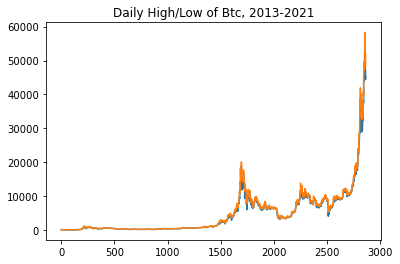

In [25]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(range(len(btc)), btc['Low'])  # Plot some data on the axes.
ax.plot(range(len(btc)), btc['High']) 
ax.set_title('Daily High/Low of Btc, 2013-2021')

In [26]:
z = np.array([a,b,c,d,e])
z

array([[1547.        , 1314.        ,    1.17732116],
       [1374.        , 1488.        ,    0.9233871 ],
       [1231.        , 1242.        ,    0.99114332],
       [1308.        , 1455.        ,    0.89896907],
       [1012.        , 1019.        ,    0.99313052]])

In [27]:
highers = z[:,:1]
lowers = z[:, 1:2]
change = z[:,2:3]

highers
lowers
change

array([[1.17732116],
       [0.9233871 ],
       [0.99114332],
       [0.89896907],
       [0.99313052]])

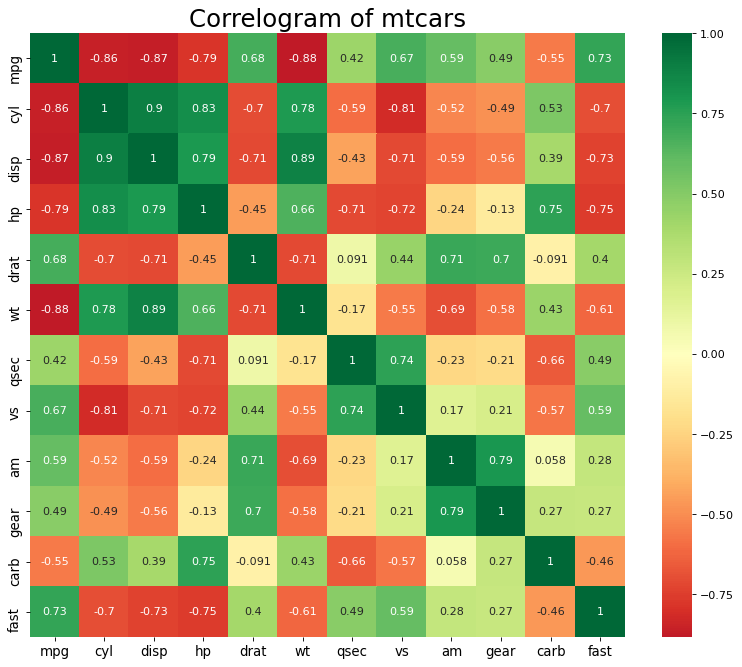

In [28]:
# Import Dataset
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")

# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


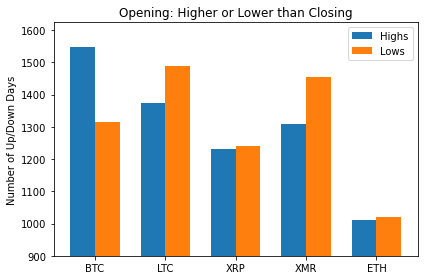

In [29]:

labels = ['BTC', 'LTC', 'XRP', 'XMR', 'ETH']
high = highers.squeeze()
low = lowers.squeeze()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, high, width, label='Highs')
rects2 = ax.bar(x + width/2, low, width, label='Lows')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Up/Down Days')
ax.set_title('Opening: Higher or Lower than Closing')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(bottom= 900)
ax.legend()


fig.tight_layout()

plt.show()   #dis chart shows up/down days smwhat clearly; .squeeze() i don't get what u do but thanks i need u :)



In [30]:
### you are now entering correlation country ###  
 # lets face it, theres not going to be a whole lot from the price data.
    #we look at high/low days, I WILL look at percentage swings somehow
    #what do we correlate? price, swing, percent, marketcap? lets do them all ?
    

In [31]:
#What does a basica Pearson correlation look like? Lets find out#

#Lets see how correlated BTC AND LTC 

# ct1a = btc['Low'].squeeze()
# ct1b = ltc['Low'].squeeze()
# ct1c = xrp['Low']
# ct1d = xmr['Low']
# ct1e = eth['Low']


In [32]:
# stats.pearsonr(ct1a, ct1c)

In [33]:
#ok, i'm realizing that the datasets are different lengths. Going to shorten to standardize, then try to compare.

#8/8/2015 is the start date, len should be 2031 for now. I'm gonna try slicing before SQL and shit.

#MAGIC LEN = 2031 *****

In [34]:
btctrim= btc['Low'].iloc[831:]

In [35]:
# len(ct1c)

In [36]:
#stats.pearsonr(btctrim, ct1e)

In [37]:
#note on correlation- we have a few metrics to correlate on:
    #open close high low volume cap swing percent should i write a "getpearson" func? 
    # probably yes, but I think the
    #mvp/ smartest thing would be percentage change even though price data is far easier - if I want to 
    # compare any coins against something, I will HAVE to calculate percentage change vs just grab prices.
    #The thing to note is that percent change is caclulated 
    #######    off daily High/Low rather than the change from open/close ######### 
    # which could be another interesting column to add and analyize if possible/neccessary ** 
    
    #What are the yardsticks to compare it to? GOLD/Other precious metals, GDP, Oil/Gas? 
    #Commodities - Gold, oil, coffee
    #ETFS: Shares (GLD) and iShares Gold Trust (IAU)
    
    #hint - lets start simple :)
    
    # first go-round will examine correlation of PRICE INFO (not rate of change), delta will come later.
    
    
    

In [38]:
# lets trim all df down to magic num len: 2031.

len(btctrim)
ltctrim = ltc['Low'].iloc[831:]
len(ltctrim)
xrptrim = xrp['Low'].iloc[733:]
len(xrptrim)
xmrtrim = xmr['Low'].iloc[442:]
len(xmrtrim)
ethtrim = eth['Low']
len(ethtrim)
# lets hit correlation country
type(btctrim)

pandas.core.series.Series

In [39]:
trims = btctrim, ltctrim, xrptrim, xmrtrim, ethtrim
type(trims)



tuple

In [40]:
stats.pearsonr(btctrim, ltctrim)

(0.6881281662082426, 5.648609214400735e-285)

In [41]:
stats.pearsonr(btctrim, xrptrim)

(0.4210843444576242, 4.2554831144728555e-88)

In [42]:
stats.pearsonr(btctrim, xmrtrim)

(0.6068718830927121, 1.2235250437701414e-204)

In [43]:
stats.pearsonr(btctrim, ethtrim)

(0.8624653045131635, 0.0)

In [44]:
type(trims)

tuple

In [45]:
# I'm a little concerned BTC/ETH (highest correlation) has the lowest p-val

In [46]:
stats.pearsonr(ltctrim, xrptrim)

(0.8279949442801359, 0.0)

In [47]:
stats.pearsonr(ltctrim, xmrtrim)

(0.9392509325781944, 0.0)

In [48]:
stats.pearsonr(ltctrim, ethtrim)

(0.8439159889989176, 0.0)

In [49]:
## break  
## these are the values for correlation (10)
corrs =  (.6881281662082426, .4210843444576242, 
         .6068718830927121, .8624653045131635,
         .8279949442801359, .9392509325781944,
         .8439159889989176, .8773117141612505,
         .674485401720506, .8267110509300152)

type(corrs)

tuple

In [50]:
stats.pearsonr(xrptrim, xmrtrim)

(0.8773117141612505, 0.0)

In [51]:
stats.pearsonr(xrptrim, ethtrim)

(0.674485401720506, 1.1204809989951876e-269)

In [52]:
#break


In [53]:
stats.pearsonr(ethtrim, xmrtrim)

(0.8267110509300152, 0.0)

In [54]:
## This is all combinations of 5 choose 2 = 10

## highest correlations -  btc/eth (862), ltc/xmr (939), xrp/xmr (877)

### lowest correlations - btc/xrp (42), btc/xmr (606), xrp/eth (674)

##regression plot 


#coef = np.polyfit(x,y,1)
#poly1d_fn = np.poly1d(coef) 

##check out correlation matrix plots and get one :)



In [56]:
btctrim

831       260.709991
832       260.467987
833       262.596008
834       264.093994
835       265.468994
            ...     
2857    45290.590268
2858    47213.498162
2859    47093.853019
2860    44454.842114
2861    45269.025766
Name: Low, Length: 2031, dtype: float64

In [ ]:
# Import Dataset
df = mydf

# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(mydf.corr(), xticklabels=mydf.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [ ]:
gg = 'abcd'
gg

In [57]:
trimmed = pd.DataFrame(btctrim, ltctrim, xrptrim, xmrtrim, ethtrim)

In [62]:
testdic = {'BTC': btctrim.reset_index(drop=True), 'LTC': ltctrim.reset_index(drop=True), 'XRP': xrptrim.reset_index(drop=True), 'XMR': xmrtrim.reset_index(drop=True), 'ETH': ethtrim}
testdic
trimmed_df = pd.DataFrame(testdic)
trimmed_df.corr()

,BTC,LTC,XRP,XMR,ETH
BTC,1.000000,0.688128,0.421084,0.606872,0.862465
LTC,0.688128,1.000000,0.827995,0.939251,0.843916
XRP,0.421084,0.827995,1.000000,0.877312,0.674485
XMR,0.606872,0.939251,0.877312,1.000000,0.826711
ETH,0.862465,0.843916,0.674485,0.826711,1.000000


In [ ]:
btctrim.reset_index(drop=True)

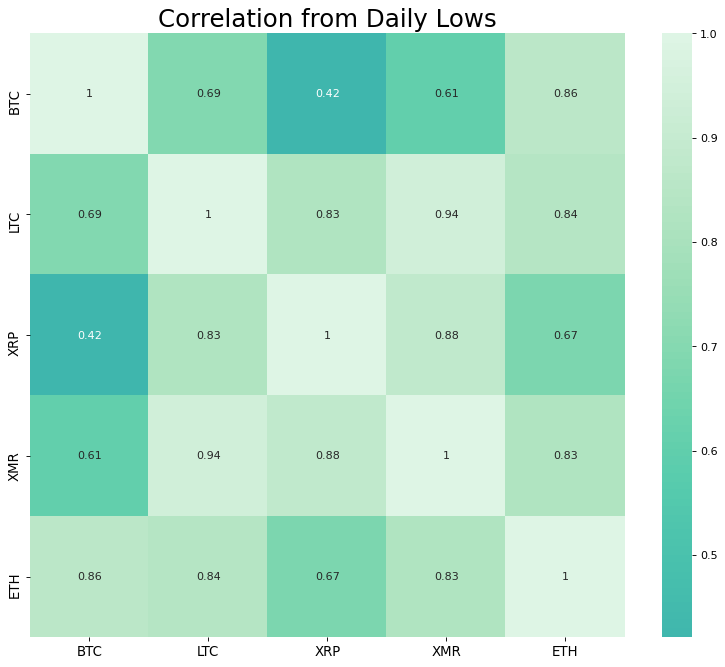

In [74]:
# Import Dataset
df = trimmed_df

# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(trimmed_df.corr(), xticklabels=trimmed_df.corr().columns, yticklabels=trimmed_df.corr().columns, cmap='mako', center=0, annot=True)

# Decorations
plt.title('Correlation from Daily Lows', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

